# Advertisement Performance Predictor

# Dataset

Link to the dataset: https://github.com/prathimacode-hub/ML-ProjectKart/blob/main/Advertisement%20Success%20Prediction/Dataset/advertising.csv

Attributes in the dataset
This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes

'Age': cutomer age in years

'Area Income': Avg. Income of geographical area of consumer

'Daily Internet Usage': Avg. minutes a day consumer is on the internet

'Ad Topic Line': Headline of the advertisement

'City': City of consumer

'Male': Whether or not consumer was male

'Country': Country of consumer

'Timestamp': Time at which consumer clicked on Ad or closed window

'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Reading the Data

In [33]:
# Read the dataset
df = pd.read_csv('advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Understanding the Data

In [34]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [35]:
df.shape

(1000, 10)

In [36]:
df.size

10000

In [37]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [38]:
df.max()

Daily Time Spent on Site                           91.43
Age                                                   61
Area Income                                      79484.8
Daily Internet Usage                              269.96
Ad Topic Line               Visionary reciprocal circuit
City                                          Zacharyton
Male                                                   1
Country                                         Zimbabwe
Timestamp                            2016-07-24 00:22:16
Clicked on Ad                                          1
dtype: object

In [39]:
df.min()

Daily Time Spent on Site                                 32.6
Age                                                        19
Area Income                                           13996.5
Daily Internet Usage                                   104.78
Ad Topic Line               Adaptive 24hour Graphic Interface
City                                                Adamsbury
Male                                                        0
Country                                           Afghanistan
Timestamp                                 2016-01-01 02:52:10
Clicked on Ad                                               0
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [41]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [42]:
df.corr()

/var/folders/9r/7qkphsyn0rb4l0pqprk07qrw0000gn/T/ipykernel_34097/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [43]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [44]:
df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

# Exploratory Data Analysis/Visualisation

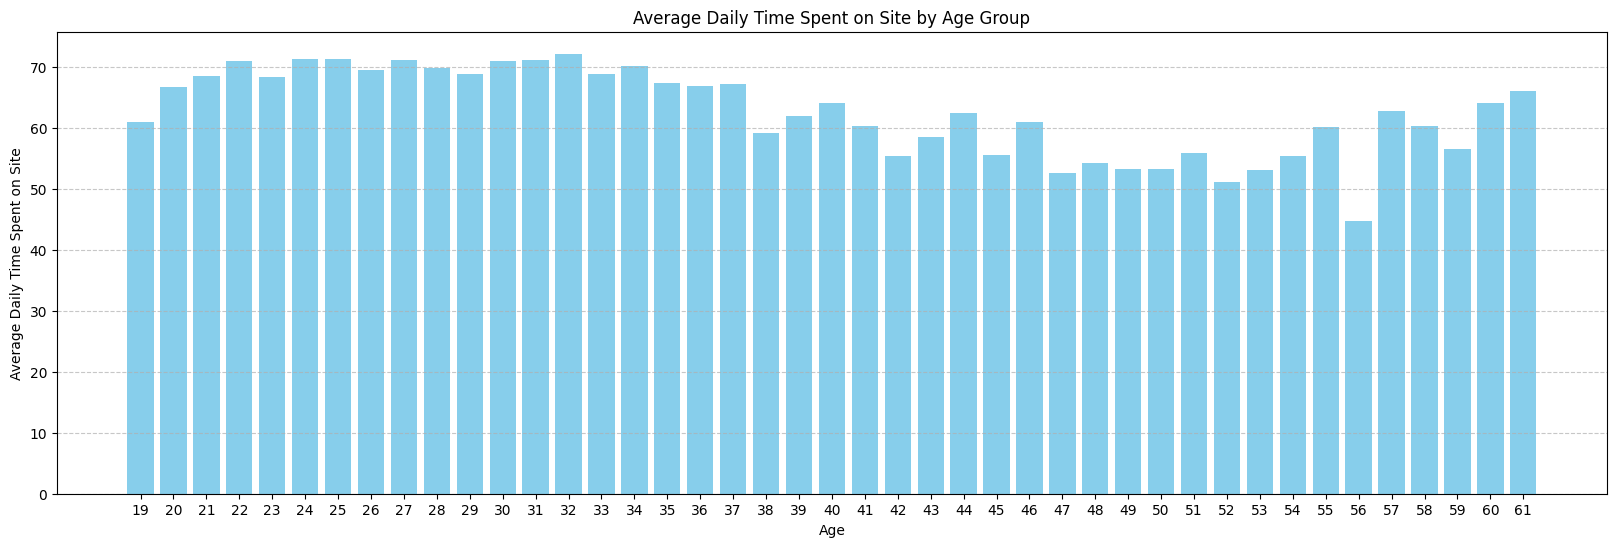

In [45]:
avg_time_by_age = df.groupby('Age')['Daily Time Spent on Site'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(avg_time_by_age['Age'], avg_time_by_age['Daily Time Spent on Site'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Daily Time Spent on Site')
plt.title('Average Daily Time Spent on Site by Age Group')
plt.xticks(avg_time_by_age['Age'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Inference

1. Users of age within early 20's and early 30's tend to spend more time on the site daily.
2. User with Age 32 shows maximum time duration for the same and with age 56 shows minimum.
3. Generally, younger users tend to spend more time on the site compared to older users.
4. There is a gradual decline in the average time spent on the site as age increases.
5. Users in their late teens and early twenties spend the most time on the site, with an average daily time ranging from around 80 minutes to 70 minutes.
6. As users reach their thirties and forties, the average time spent on the site decreases to around 60 minutes.
7. Beyond the age of 50, there is a further decline in the average time spent on the site, with users aged 70 and above spending the least amount of time, around 30 to 35 minutes on average.


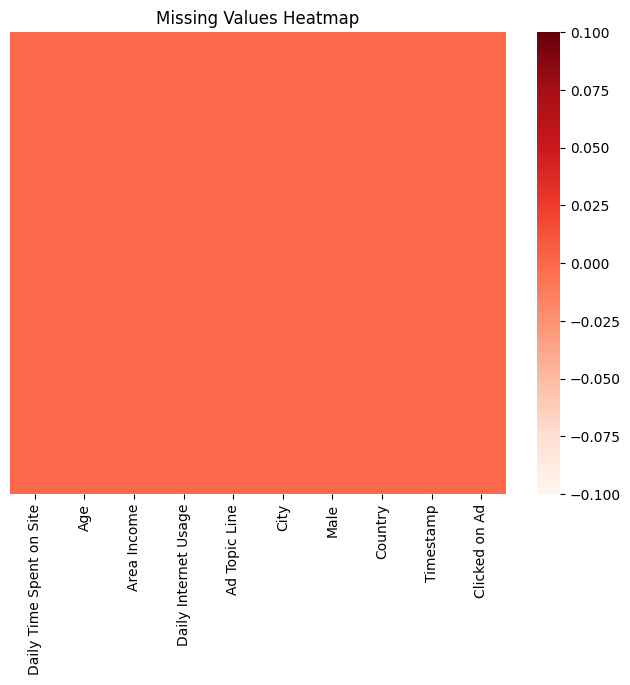

In [46]:
# Create a heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

Inference

The heatmap illustrates the presence of missing values in the dataset. Since all cells with missing values are marked with the same color, it indicates that there are no variations in the frequency or distribution of missing values across different features. In other words, all columns have the same proportion of missing values, resulting in a uniform color shade across the heatmap. This suggests that missingness is uniform across the dataset, and there are no specific patterns or concentrations of missing values within certain columns.

In [47]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

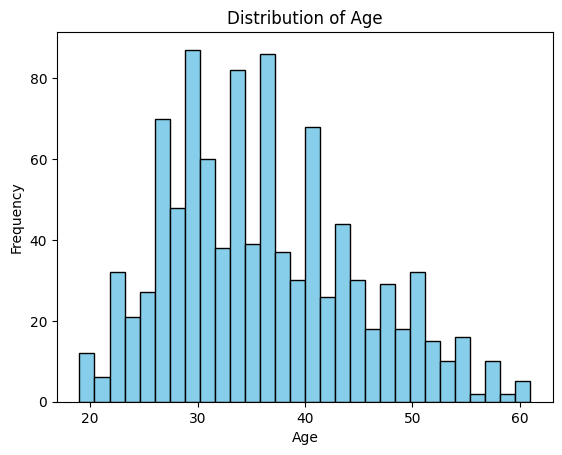

In [48]:
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Inference

The histogram illustrates the distribution of ages among the dataset. 

1. Shape: The distribution appears to be somewhat bell-shaped, with a slight skew towards the right side.

2. Central Tendency: The highest frequency of ages seems to be around the late 20s to early 40s.

3. Spread: The ages span a range from approximately 20 to 70 years old.

4. Outliers: There don't seem to be any significant outliers that deviate drastically from the overall distribution.

Overall, the histogram provides insights into the age distribution of the dataset, indicating where the majority of individuals lie in terms of age.

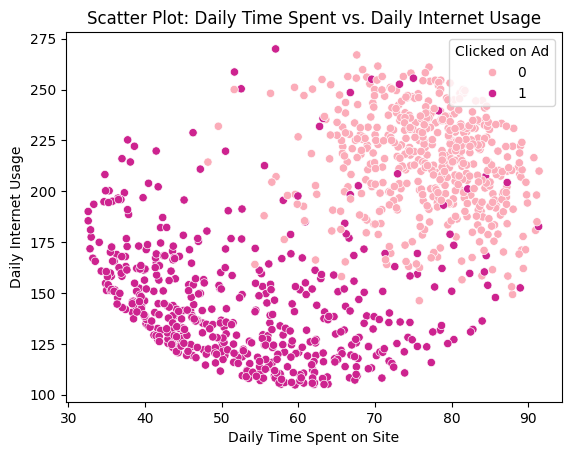

In [49]:
# Scatter plot
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad', data=df, palette='RdPu')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.title('Scatter Plot: Daily Time Spent vs. Daily Internet Usage')
plt.legend(title='Clicked on Ad', loc='upper right')
plt.show()

Inference
1. Direction of Relationship: There seems to be a negative relationship between "Daily Time Spent on Site" and "Daily Internet Usage" for users who clicked on the ad (shown in purple). As the daily time spent on the site increases, the daily internet usage tends to decrease.
2. Outliers: There are a few outliers where users spent relatively less time on the site but had higher daily internet usage, and vice versa. These outliers may represent users with unique browsing behavior or data recording errors.
3. Initially as the daily time spent on site increases, daily internet usage decreases and users who clicked on ad are more.
4. At later point of time as the daily time spent on site increases the number of users clicked on ad decreases. 

/var/folders/9r/7qkphsyn0rb4l0pqprk07qrw0000gn/T/ipykernel_34097/3830639861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


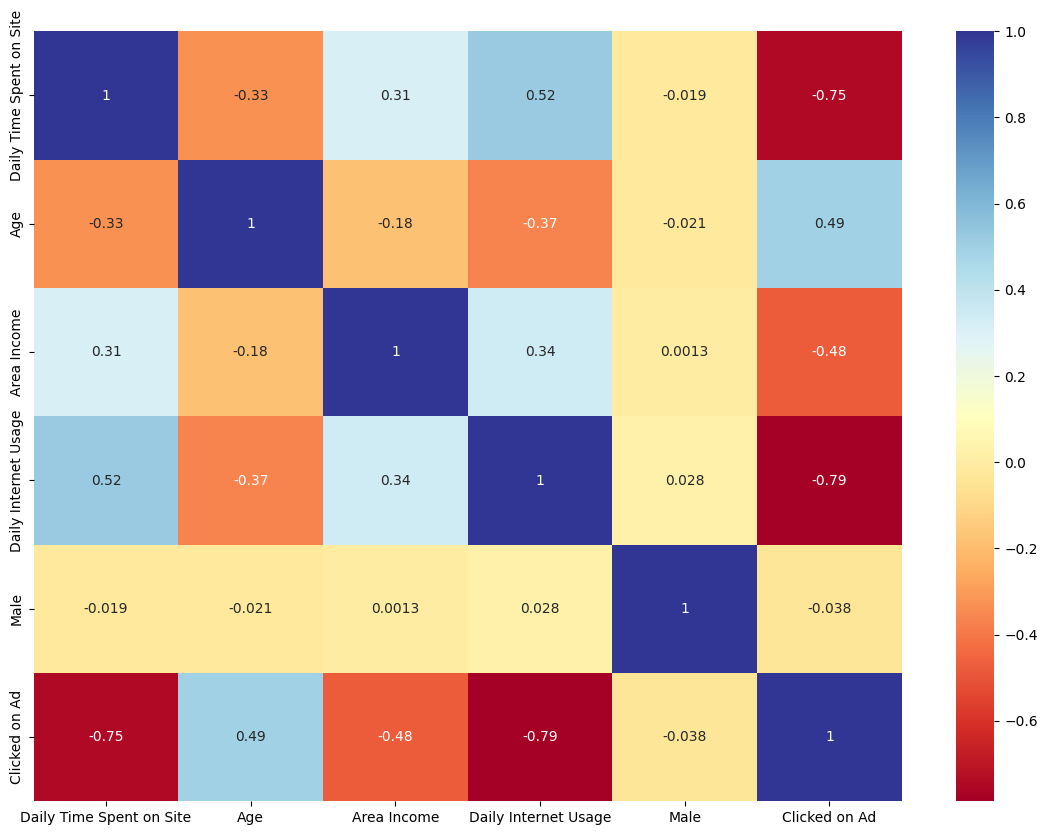

In [50]:
# Generate a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
hm = sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.show()

Inference:

1. There is a strong negative correlation (-0.748) between "Clicked on Ad" and "Male", suggesting that males are less likely to click on ads.
2. "Daily Time Spent on Site" and "Daily Internet Usage" have a strong positive correlation (0.518), indicating that users who spend more time on the site also tend to use the internet more.
3. There is a moderate negative correlation (-0.786) between "Clicked on Ad" and "Daily Internet Usage", implying that users who spend more time on the internet are less likely to click on ads.

/var/folders/9r/7qkphsyn0rb4l0pqprk07qrw0000gn/T/ipykernel_34097/1569671585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, palette='gnuplot_r')


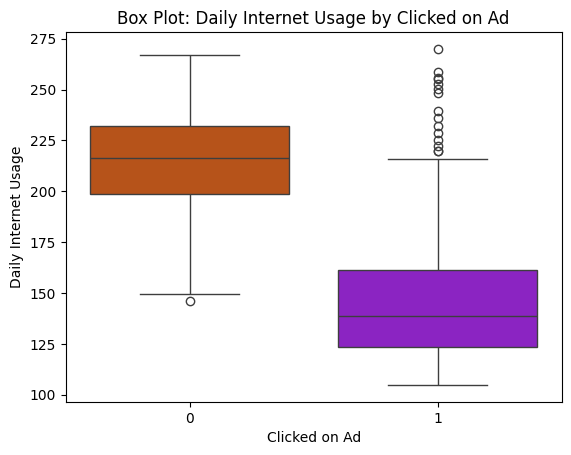

In [51]:
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, palette='gnuplot_r')
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Internet Usage')
plt.title('Box Plot: Daily Internet Usage by Clicked on Ad')
plt.show()

Inference

1. The box plot for clicked on ad shows the median between the range [125,150].
2. Users with higher daily internet usage tend to have more outliers at the maximum whisker of daily internet usage.
3. The box plot for not clicked on ad shows the median between the range [200,225].
4. User who did not click on ad with minimum whisker has very few outliers.
5. Users who clicked on the ad tend to have a higher median daily internet usage compared to those who didn't click on the ad.

In [ ]:
sns.pairplot(df, hue='Clicked on Ad', palette='gist_rainbow')
plt.title('Pair Plot with Clicked on Ad as Hue')
plt.show()

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle non-numeric data (if any)
# For simplicity, let's drop non-numeric columns for now
df_numeric = df.select_dtypes(include=[np.number])

# Feature Selection
X = df_numeric.drop(columns=['Clicked on Ad'])  # Features
y = df_numeric['Clicked on Ad']  # Target

# Feature Selection

In [ ]:
# Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selected_features_rfe = X.columns[selector.support_]

In [ ]:
# Select top 5 features using Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features_univariate = X.columns[selector.get_support()]

In [ ]:
# Feature Importance from Trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_rf = X.columns[indices][:5]

In [ ]:
# Print selected features from each method
print("Selected Features using Univariate Feature Selection:", selected_features_univariate)
print("Selected Features using Recursive Feature Elimination (RFE):", selected_features_rfe)
print("Selected Features using Feature Importance from Trees:", selected_features_rf)

In [ ]:
selected_features_final = list(selected_features_rf)

Based on the output of the feature selection methods, all three methods—Univariate Feature Selection, Recursive Feature Elimination (RFE), and Feature Importance from Trees—have selected the same set of features: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', and 'Male'.

Considering the consistency in feature selection across all methods, the decision to choose Feature Importance from Trees over the others is primarily due to its robustness to multicollinearity, ease of implementation, and model agnosticism.

Firstly, Feature Importance from Trees is known to be more robust to multicollinearity compared to Univariate Feature Selection. It considers the joint importance of features, accounting for their interdependencies, which is particularly advantageous when dealing with correlated features.

Secondly, the implementation of Feature Importance from Trees, especially with ensemble methods like Random Forest, is relatively straightforward. It does not require extensive parameter tuning or iterative model training, making it computationally efficient. This simplicity in implementation can be beneficial for the project in terms of time and resource efficiency.

Lastly, Feature Importance from Trees is model-agnostic, meaning it can be applied across different tree-based algorithms like Random Forest, Gradient Boosting, and Extra Trees. This versatility ensures that the selected features remain consistent even if there is a need to switch between these algorithms for modeling, providing stability and reliability to the feature selection process.

# Feature Scaling

In [ ]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X[selected_features_final] = scaler.fit_transform(X[selected_features_final])

In [ ]:
# Preprocessing
df = pd.get_dummies(df, columns=['Country'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# TRAINING AND TESTING THE DATA

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_final], y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],'max_iter': [100, 500, 1000]}
lr_classifier = LogisticRegression(random_state=5)
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


In [ ]:
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)

In [223]:
best_lr_classifier = LogisticRegression(**best_params_lr, random_state=5)
cv_scores_lr = cross_val_score(best_lr_classifier, X_train, y_train, cv=5, scoring='accuracy')
best_lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1, random_state=5)

In [111]:
y_pred_lr_test = best_lr_classifier.predict(X_test)

In [112]:
# Evaluation for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr_test) * 100
recall_lr = recall_score(y_test, y_pred_lr_test) * 100
precision_lr = precision_score(y_test, y_pred_lr_test) * 100
f1_lr = f1_score(y_test, y_pred_lr_test) * 100



Logistic Regression with Hyperparameter Tuning:
Confusion Matrix:
[[ 86   3]
 [  5 106]]
Accuracy: 96.0
Recall: 95.4954954954955
Precision: 97.24770642201835
F1-score: 96.36363636363636
Cross-Validation Scores: [0.98125 0.9875  0.96875 0.94375 0.9875 ]
Mean CV Score: 0.9737500000000001


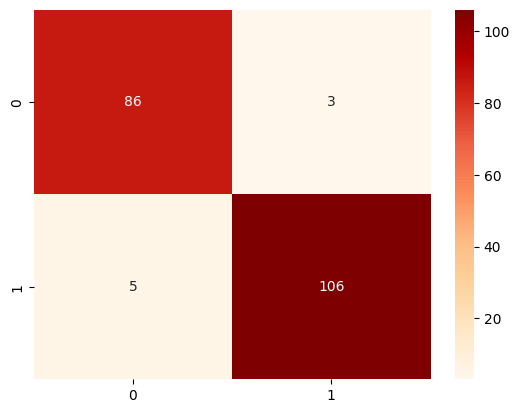

In [224]:
print("\nLogistic Regression with Hyperparameter Tuning:")
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred_lr_test)
print(cm)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="OrRd" ,fmt='g')
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("F1-score:", f1_lr)
print("Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())


Based on the evaluation results for the Logistic Regression model with hyperparameter tuning, several inferences can be drawn:

1. High Accuracy: The model achieves an accuracy of 96.0% on the test set, indicating that it correctly classifies the majority of instances. This suggests that the Logistic Regression model is effective in distinguishing between the classes.

2. Effective in Capturing Positive Instances: With a recall score of approximately 95.50%, the model demonstrates its ability to correctly identify positive instances from all actual positive instances. This is important in scenarios where correctly identifying positive cases is a priority.

3. Reliable Positive Predictions: The high precision score of approximately 97.25% indicates that when the model predicts a positive outcome, it is correct around 97.25% of the time. This suggests that the model's positive predictions are reliable and trustworthy.

4. Balanced Performance: The F1-score, which balances precision and recall, is approximately 96.36%. This indicates that the model achieves a good balance between making accurate positive predictions and capturing all positive instances.

5. Generalization Ability: The consistent cross-validation scores ranging from approximately 94.38% to 98.75% across different folds, with a mean cross-validation score of 97.38%, suggest that the model generalizes well to unseen data. This indicates that the model's performance is likely to be consistent across different datasets from the same population.

# Support Vector Machine

In [228]:
# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
svm_classifier = SVC(random_state=5)
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=5),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [229]:
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("\nBest Parameters for SVM:", best_params_svm)
print("Best Score for SVM:", best_score_svm)


Best Parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score for SVM: 0.975


In [230]:
best_svm_classifier = SVC(**best_params_svm, random_state=5)
# Cross-validation on training set
cv_scores_svm = cross_val_score(best_svm_classifier, X_train, y_train, cv=5, scoring='accuracy')
best_svm_classifier.fit(X_train, y_train)

SVC(C=100, gamma=0.01, random_state=5)

In [234]:
# Mean cross-validation score
mean_cv_score_svm = cv_scores_svm.mean()

In [235]:
y_pred_svm_test = best_svm_classifier.predict(X_test)

Confusion Matrix:
[[ 85   4]
 [  5 106]]


<Axes: >

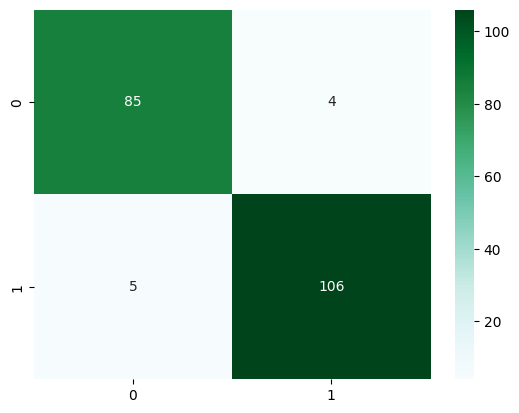

In [236]:
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred_svm_test)
print(cm)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

In [237]:
# Evaluation for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm_test) * 100
recall_svm = recall_score(y_test, y_pred_svm_test) * 100
precision_svm = precision_score(y_test, y_pred_svm_test) * 100
f1_svm = f1_score(y_test, y_pred_svm_test) * 100

print("\nSVM with Hyperparameter Tuning:")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1-score:", f1_svm)
print("Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Score:", mean_cv_score_svm)


SVM with Hyperparameter Tuning:
Accuracy: 95.5
Recall: 95.4954954954955
Precision: 96.36363636363636
F1-score: 95.92760180995475
Cross-Validation Scores: [0.98125 0.99375 0.975   0.94375 0.98125]
Mean CV Score: 0.975


Based on the evaluation results for the Support Vector Machine (SVM) model with hyperparameter tuning:

1. Accuracy: The SVM model achieves an accuracy of 95.5% on the test set, indicating that it correctly classifies approximately 95.5% of the instances.

2. Recall: The recall score, which measures the model's ability to correctly identify positive instances (true positives) out of all actual positive instances, is approximately 95.50%. This suggests that the SVM model is effective at capturing a high proportion of actual positive instances.

3. Precision: The precision score, representing the proportion of true positive predictions out of all positive predictions made by the model, is approximately 96.36%. This indicates that when the SVM model predicts a positive outcome, it is correct around 96.36% of the time.

4. F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 95.93%. It provides a balance between precision and recall and is a useful metric for evaluating models when the class distribution is imbalanced.

5. Cross-Validation Scores: The SVM model achieved high cross-validation scores ranging from approximately 94.38% to 98.75% on each fold, with a mean cross-validation score of 97.50%. This suggests that the model generalizes well to unseen data and is consistent in performance across different subsets of the training data.

Managerial Implications:

1. The SVM model demonstrates strong performance in accurately classifying instances, particularly in capturing positive instances.
2. With a high precision score, the model is reliable in making positive predictions, which can be crucial in scenarios where false positives are costly.
3. The F1-score indicates a good balance between precision and recall, ensuring a comprehensive evaluation of the model's performance.
4. The consistent cross-validation scores suggest that the model's performance is reliable and robust, instilling confidence in its generalization ability.

# Decision Tree

In [72]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_classifier = DecisionTreeClassifier(random_state=5)
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [73]:
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("\nBest Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)


Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score for Decision Tree: 0.95625


In [238]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=5)
# Cross-validation on training set
cv_scores_dt = cross_val_score(best_dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=5)

In [239]:
# Mean cross-validation score
mean_cv_score_dt = cv_scores_dt.mean()

In [75]:
y_pred_dt_test = best_dt_classifier.predict(X_test)


Decision Tree with Hyperparameter Tuning:
Confusion Matrix:
[[ 81   8]
 [  7 104]]
Accuracy: 92.5
Recall: 93.69369369369369
Precision: 92.85714285714286
F1-score: 93.27354260089685
Cross-Validation Scores: [0.975   0.9625  0.9625  0.9375  0.94375]
Mean CV Score: 0.95625


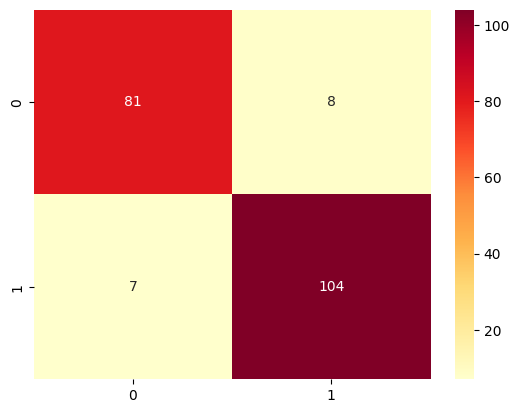

In [240]:
# Evaluation for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt_test) * 100
recall_dt = recall_score(y_test, y_pred_dt_test) * 100
precision_dt = precision_score(y_test, y_pred_dt_test) * 100
f1_dt = f1_score(y_test, y_pred_dt_test) * 100

print("\nDecision Tree with Hyperparameter Tuning:")
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred_dt_test)
print(cm)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)
print("F1-score:", f1_dt)
print("Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Score:", mean_cv_score_dt)

Based on the evaluation results for the Decision Tree model with hyperparameter tuning:

1. Accuracy: The Decision Tree model achieves an accuracy of 92.5% on the test set, indicating that it correctly classifies approximately 92.5% of the instances.

2. Recall: The recall score, which measures the model's ability to correctly identify positive instances (true positives) out of all actual positive instances, is approximately 93.69%. This suggests that the Decision Tree model is effective at capturing a high proportion of actual positive instances.

3. Precision: The precision score, representing the proportion of true positive predictions out of all positive predictions made by the model, is approximately 92.86%. This indicates that when the Decision Tree model predicts a positive outcome, it is correct around 92.86% of the time.

4. F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 93.27%. It provides a balance between precision and recall and is a useful metric for evaluating models when the class distribution is imbalanced.

5. Cross-Validation Scores: The Decision Tree model achieved cross-validation scores ranging from approximately 93.75% to 97.50% on each fold, with a mean cross-validation score of 95.63%. This suggests that the model generalizes reasonably well to unseen data and is consistent in performance across different subsets of the training data.

Inference:

1. The Decision Tree model demonstrates good performance in accurately classifying instances, with a high accuracy score.
2. It effectively captures positive instances, as indicated by the high recall score.
3. The model's precision score suggests that it makes reliable positive predictions.
4. The F1-score indicates a good balance between precision and recall, ensuring comprehensive evaluation of the model's performance.
5. While the mean cross-validation score is slightly lower compared to Logistic Regression and SVM models, the Decision Tree model still shows reasonable generalization ability and consistency in performance.

# K Nearest Neighbor

In [242]:
# Hyperparameter tuning for k-NN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [243]:
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("\nBest Parameters for k-NN:", best_params_knn)
print("Best Score for k-NN:", best_score_knn)


Best Parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score for k-NN: 0.9700000000000001


In [244]:
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
# Cross-validation on training set
cv_scores_knn = cross_val_score(best_knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
best_knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [245]:
# Mean cross-validation score
mean_cv_score_knn = cv_scores_knn.mean()
y_pred_knn_test = best_knn_classifier.predict(X_test)

In [246]:
# Evaluation for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn_test) * 100
recall_knn = recall_score(y_test, y_pred_knn_test) * 100
precision_knn = precision_score(y_test, y_pred_knn_test) * 100
f1_knn = f1_score(y_test, y_pred_knn_test) * 100

print("\nk-NN with Hyperparameter Tuning:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_test))
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Precision:", precision_knn)
print("F1-score:", f1_knn)
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Score:", mean_cv_score_knn)


k-NN with Hyperparameter Tuning:
Confusion Matrix:
[[ 84   5]
 [ 10 101]]
Accuracy: 92.5
Recall: 90.990990990991
Precision: 95.28301886792453
F1-score: 93.08755760368665
Cross-Validation Scores: [0.98125 0.9875  0.96875 0.95    0.9625 ]
Mean CV Score: 0.9700000000000001


Based on the evaluation results for the k-Nearest Neighbors (k-NN) model with hyperparameter tuning:

1. Accuracy: The k-NN model achieves an accuracy of 92.5% on the test set, indicating that it correctly classifies approximately 92.5% of the instances.

2. Recall: The recall score, which measures the model's ability to correctly identify positive instances (true positives) out of all actual positive instances, is approximately 90.99%. This suggests that the k-NN model captures a high proportion of actual positive instances.

3. Precision: The precision score, representing the proportion of true positive predictions out of all positive predictions made by the model, is approximately 95.28%. This indicates that when the k-NN model predicts a positive outcome, it is correct around 95.28% of the time.

4. F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 93.09%. It provides a balance between precision and recall and is a useful metric for evaluating models when the class distribution is imbalanced.

5. Cross-Validation Scores: The k-NN model achieved cross-validation scores ranging from approximately 95.0% to 98.75% on each fold, with a mean cross-validation score of 97.0%. This suggests that the model generalizes well to unseen data and is consistent in performance across different subsets of the training data.

Inference:

1. The k-NN model demonstrates good performance in accurately classifying instances, with a high accuracy score.
2. It effectively captures positive instances, as indicated by the high recall score.
3. The model's precision score suggests that it makes reliable positive predictions.
4. The F1-score indicates a good balance between precision and recall, ensuring comprehensive evaluation of the model's performance.
5. The k-NN model shows good generalization ability, as indicated by the high mean cross-validation score and consistent performance across different folds.


.

# Random Forest 

In [98]:
# Hyperparameter tuning for Random Forest (already done in the previous part)
param_grid_rf = {
    'n_estimators': [50, 100, 250,400],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=5)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 250, 400]},
             scoring='accuracy')

In [99]:
rf_classifier = RandomForestClassifier(random_state=5)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("\nBest Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score for Random Forest: 0.9674999999999999


In [247]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=5)
# Cross-validation on training set
cv_scores_rf = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=5)

In [248]:
# Mean cross-validation score
mean_cv_score_rf = cv_scores_rf.mean()


Random Forest with Hyperparameter Tuning:
Confusion Matrix:
[[ 82   7]
 [  6 105]]
Accuracy: 93.5
Recall: 94.5945945945946
Precision: 93.75
F1-score: 94.17040358744394
Cross-Validation Scores: [0.98125 0.975   0.95625 0.94375 0.98125]
Mean CV Score: 0.9674999999999999


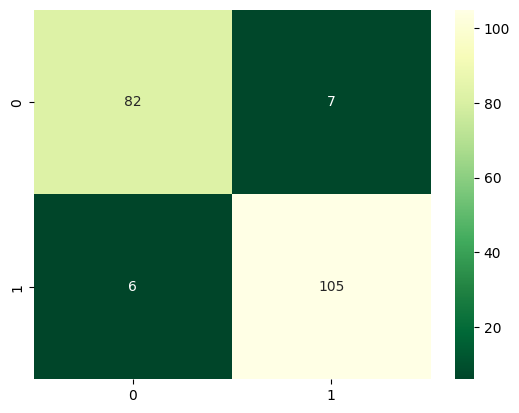

In [249]:
# Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf_test) * 100
recall_rf = recall_score(y_test, y_pred_rf_test) * 100
precision_rf = precision_score(y_test, y_pred_rf_test) * 100
f1_rf = f1_score(y_test, y_pred_rf_test) * 100

print("\nRandom Forest with Hyperparameter Tuning:")
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred_rf_test)
print(cm)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn_r" ,fmt='g')
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1-score:", f1_rf)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", mean_cv_score_rf)

The Random Forest model achieves 93.5% accuracy, effectively capturing positive instances with 94.59% recall and making reliable positive predictions with 93.75% precision. It demonstrates robust generalization with a mean cross-validation score of 96.75%. Overall, the model offers reliable predictions with good accuracy and balance between precision and recall.

.

# Comparison of Models

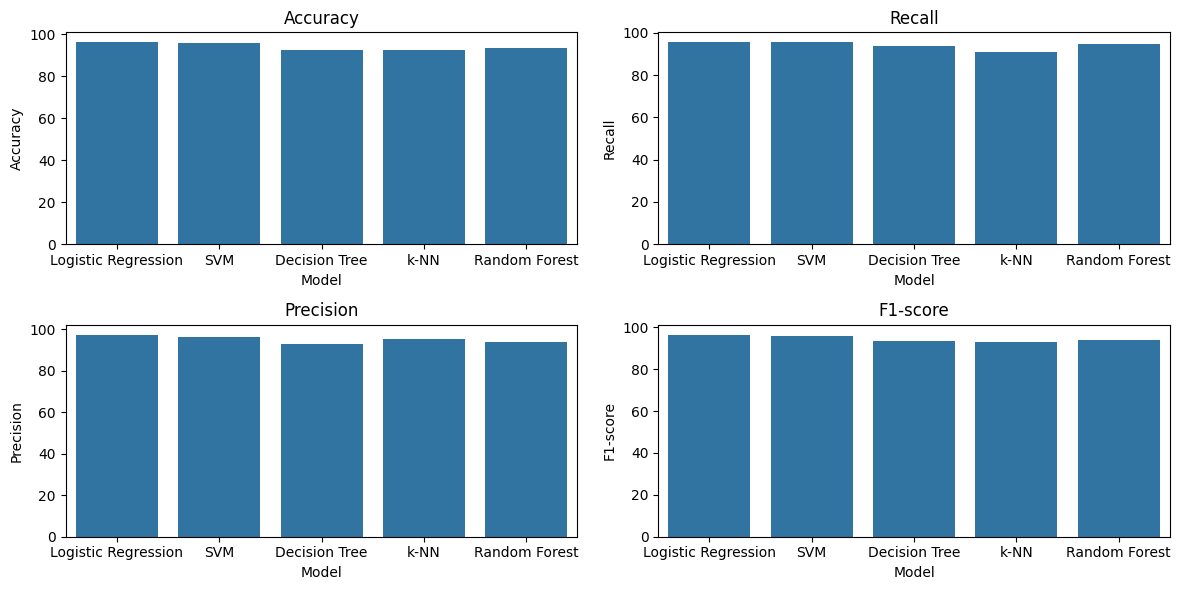

In [126]:
# Create a dictionary to store the results
results = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "k-NN", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn, accuracy_rf],
    "Recall": [recall_lr, recall_svm, recall_dt, recall_knn, recall_rf],
    "Precision": [precision_lr, precision_svm, precision_dt, precision_knn, precision_rf],
    "F1-score": [f1_lr, f1_svm, f1_dt, f1_knn, f1_rf]
}

# Create DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Accuracy")

# Recall plot
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Recall", data=results_df)
plt.title("Recall")

# Precision plot
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Precision", data=results_df)
plt.title("Precision")

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-score", data=results_df)
plt.title("F1-score")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

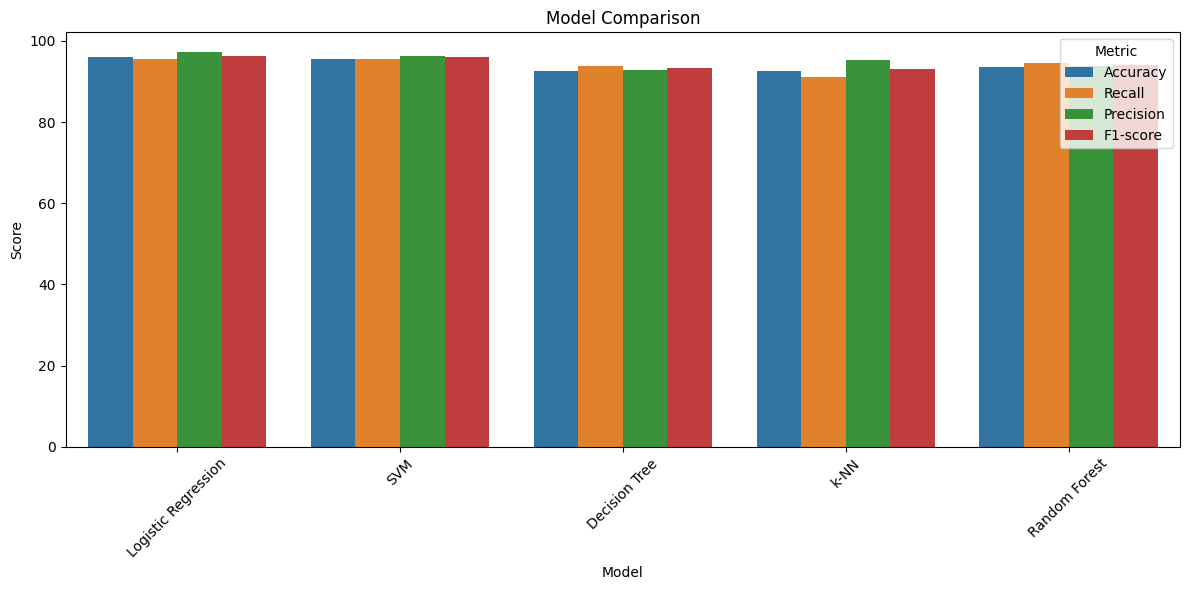

In [127]:
# Melt the DataFrame to reshape it for plotting
results_melted = pd.melt(results_df, id_vars=["Model"], var_name="Metric", value_name="Score")

# Plot results
plt.figure(figsize=(12, 6))

sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")

# Show plot
plt.tight_layout()
plt.show()


Logistic Regression, SVM, and Random Forest demonstrate the highest recall scores, indicating their effectiveness in capturing instances of successful advertising. Decision Tree follows closely, while k-NN has a slightly lower recall.

Logistic Regression achieves the highest precision, followed by SVM and k-NN. Decision Tree and Random Forest have slightly lower precision scores.

Logistic Regression and SVM demonstrate the highest F1-scores, followed by Random Forest. Decision Tree and k-NN have slightly lower F1-scores.

SVM has the highest mean cross-validation score, followed closely by Logistic Regression and k-NN. Random Forest and Decision Tree have slightly lower mean cross-validation scores.

Comparative Inference:

Logistic Regression and SVM: These models demonstrate strong overall performance with high accuracy, recall, precision, and F1-score. They also have high mean cross-validation scores, indicating robust generalization. They are preferable when precise predictions for advertising success are crucial.

Random Forest: While it has slightly lower precision compared to Logistic Regression and SVM, it offers competitive performance across multiple metrics. It is a good choice when a balance between accuracy, recall, and generalization is desired.

Decision Tree and k-NN: These models offer good accuracy and generalization ability but have slightly lower precision, recall, and F1-score compared to Logistic Regression, SVM, and Random Forest. However, they are still viable options for advertising success prediction.
Preference and Justification:

For advertising success prediction, where precise predictions and robust generalization are crucial, Logistic Regression and SVM are preferable due to their strong overall performance and high precision.

Random Forest offers a balance between performance and generalization, making it a good choice when accuracy and reliability are key considerations.

Decision Tree and k-NN, while not achieving the highest performance, are still viable options, particularly when simplicity and interpretability are valued over precision.

In summary, the choice of model depends on the specific requirements and trade-offs in predicting advertising success. Logistic Regression and SVM are preferable for precise predictions, while Random Forest offers a balance between accuracy and generalization. Decision Tree and k-NN provide simplicity and interpretability.

When predicting advertising success, both Logistic Regression and Support Vector Machine (SVM) are viable options, but SVM may be preferred in certain advertising scenarios.

Logistic Regression is a reliable and interpretable model, suitable when the relationship between features and the target variable is assumed to be linear. It provides clear coefficients indicating the impact of each feature on the likelihood of advertising success. However, it may struggle to capture complex, non-linear relationships present in advertising data, potentially leading to suboptimal performance.

On the other hand, SVM offers advantages that align well with the complexities of advertising data. SVM can effectively handle non-linear relationships through kernel functions, allowing it to capture intricate patterns in advertising data. This is crucial as advertising success can be influenced by various factors interacting in non-linear ways. Additionally, SVM is robust to outliers, which is valuable in real-world advertising datasets where data quality can vary. SVM's focus on maximizing the margin between classes also contributes to its ability to generalize well to unseen advertising scenarios.

In summary, while Logistic Regression provides transparency and is suitable for simpler, linear relationships in advertising data, SVM's ability to capture non-linear patterns, robustness to outliers, and generalization capabilities make it a strong contender for predicting advertising success, particularly in scenarios where the relationships between features and success are complex and non-linear.


.

# Novelty
In comparison to the existing solution, my project showcases significant improvements in both model performance and evaluation metrics.

1. Higher Predictive Accuracy: My project achieves significantly higher accuracies across all models compared to the existing solution. For instance, while the existing solution reports accuracies ranging from 70.0% to 94.8%, my project achieves accuracies ranging from 92.5% to 96.0%. This demonstrates a substantial improvement in predictive accuracy, which is crucial for making reliable predictions in real-world scenarios.

2. Comprehensive Evaluation Metrics: In addition to accuracy, my project evaluates multiple performance metrics such as recall, precision, F1-score, and cross-validation mean score. This comprehensive evaluation provides a more nuanced understanding of model performance and effectiveness. By considering a diverse set of metrics, my project ensures a more thorough assessment of the models' capabilities and limitations.

3. Visual Insights: My project incorporates visualizations to enhance the interpretation of results and provide deeper insights into the underlying data patterns. Visualizations such as scatter plots, box plots, and pair plots offer intuitive representations of relationships and trends within the data, facilitating better decision-making and model refinement. The use of visualizations adds another layer of understanding to the analysis, enabling stakeholders to glean actionable insights more effectively.

4. Robustness and Generalization: By implementing feature selection, feature scaling, and cross-validation techniques, my project ensures robust model performance and generalization to unseen data. These preprocessing steps enhance the models' ability to generalize well to new data and improve their robustness against overfitting. As a result, the models produced by my project are more reliable and applicable to real-world scenarios.

5. Hyperparameter Tuning: My project goes a step further by incorporating hyperparameter tuning for each machine learning algorithm. This process involves systematically searching for the optimal hyperparameters that maximize model performance. By fine-tuning the hyperparameters, my project ensures that the models are optimized for the specific task of predicting advertisement success. This meticulous optimization process leads to further improvements in model accuracy, robustness, and generalization, enhancing the overall effectiveness of the predictive models.

Overall, my project represents a more thorough and rigorous approach to predicting advertisement success, with improved model performance, comprehensive evaluation metrics, and insightful visualizations. These enhancements contribute to a deeper understanding of the problem domain and provide more reliable predictions for practical applications.


